In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


C:\Users\Sdasz\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No. of Ham & Spam')

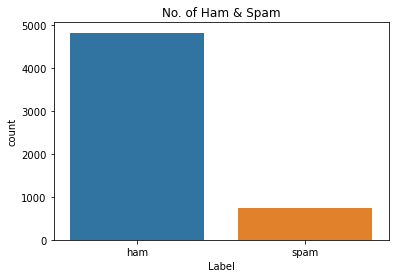

In [10]:
sns.countplot(df.v1)
plt.xlabel("Label")
plt.title("No. of Ham & Spam")

In [15]:
X = df.v2
y = df.v1

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [22]:
max_words = 1000
max_len = 100
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [26]:
sequences_matrix

array([[  0,   0,   0, ...,  93,  11, 170],
       [  0,   0,   0, ...,  42,   2,  19],
       [  0,   0,   0, ..., 527, 145, 203],
       ...,
       [  0,   0,   0, ..., 332, 145,  49],
       [  0,   0,   0, ...,   2, 183, 203],
       [  0,   0,   0, ..., 190, 251,  66]])

In [31]:
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs = inputs, outputs=layer)
    return model

In [33]:
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 100)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 100, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [37]:
model.fit(sequences_matrix, y_train, batch_size=128, epochs=10
          , validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.001)])

Epoch 1/10
30/30 [==============================] - 2s 62ms/step - loss: 0.0244 - accuracy: 0.9934 - val_loss: 0.0519 - val_accuracy: 0.9831
Epoch 2/10
30/30 [==============================] - 2s 59ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0561 - val_accuracy: 0.9873


In [42]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [43]:
accr = model.evaluate(test_sequences_matrix, y_test)

27/27 [==============================] - 0s 8ms/step - loss: 0.0625 - accuracy: 0.9821


In [46]:
print('test set\nloss: {:0.3f}\n accuracy: {:.03f}'.format(accr[0],accr[1]))

test set
loss: 0.063
 accuracy: 0.982


In [51]:
testing_context = ["oh k..i'm wtching here:)"]

texts = tok.texts_to_sequences(testing_context)
texts = sequence.pad_sequences(texts, maxlen=max_len)

In [52]:
preds = model.predict(texts)
print(preds)

[[6.0540948e-05]]
